# CUDA Sample sort analysis

In [59]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [60]:
tk = th.Thicket.from_caliperreader(glob("CUDA/random/*.cali"))

In [61]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              74575298      1   
                                                  90333699      1   
                                                  109031611     1   
                                                  205629125     1   
                                                  213921271     1   
                                                  222417728     1   
                                                  222839009     1   
                                                  228570890     1   
                                                  246136042     1   
                                                  344388625     1   
                                                  353776181     1   
                                                  431314967     1   
                                                  444690614     1   
                                                  578715905     1   
                                                  647478040     1   
                                                  708829259     1   
                                                  959664759     1   
                                                  1013720694    1   
                                                  1110544964    1   
                                                  1143749142    1   
                                                  1178866077    1   
                                                  1216875857    1   
                                                  1246959464    1   
                                                  1271479040    1   
                                                  1288110706    1   
                                                  1307389033    1   
                                                  1472945407    1   
                                                  1515612453    1   
                                                  1592643601    1   
                                                  1601621458    1   
                                                  1724237506    1   
                                                  1756006797    1   
                                                  2106897406    1   
                                                  2129716352    1   
                                                  2160417120    1   
                                                  2255977627    1   
                                                  2313656060    1   
                                                  2370254441    1   
                                                  2381482245    1   
                                                  2410175721    1   
                                                  2571351993    1   
                                                  2576322946    1   
                                                  2599943633    1   
                                                  2612288750    1   
                                                  2647570571    1   
                                                  2659730145    1   
                                                  2717976288    1   
                                                  2795274854    1   
                                                  2942168302    1   
                                                  2959951575    1   
                                                  2991989139    1   
                                                  3088381039    1   
                                                  3122411430    1   
                                                  3123855360    1   
                                                  3152420019    1   
                                                  3244827598    1   
                                                  3291800441

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [62]:
tk.metadata

cali.caliper.version  \
profile                           
74575298             2.11.0-dev   
90333699             2.11.0-dev   
109031611            2.11.0-dev   
205629125            2.11.0-dev   
213921271            2.11.0-dev   
222417728            2.11.0-dev   
222839009            2.11.0-dev   
228570890            2.11.0-dev   
246136042            2.11.0-dev   
344388625            2.11.0-dev   
353776181            2.11.0-dev   
431314967            2.11.0-dev   
444690614            2.11.0-dev   
578715905            2.11.0-dev   
647478040            2.11.0-dev   
708829259            2.11.0-dev   
959664759            2.11.0-dev   
1013720694           2.11.0-dev   
1110544964           2.11.0-dev   
1143749142           2.11.0-dev   
1178866077           2.11.0-dev   
1216875857           2.11.0-dev   
1246959464           2.11.0-dev   
1271479040           2.11.0-dev   
1288110706           2.11.0-dev   
1307389033           2.11.0-dev   
1472945407           2.11.0-dev   
1515612453           2.11.0-dev   
1592643601           2.11.0-dev   
1601621458           2.11.0-dev   
1724237506           2.11.0-dev   
1756006797           2.11.0-dev   
2106897406           2.11.0-dev   
2129716352           2.11.0-dev   
2160417120           2.11.0-dev   
2255977627           2.11.0-dev   
2313656060           2.11.0-dev   
2370254441           2.11.0-dev   
2381482245           2.11.0-dev   
2410175721           2.11.0-dev   
2571351993           2.11.0-dev   
2576322946           2.11.0-dev   
2599943633           2.11.0-dev   
2612288750           2.11.0-dev   
2647570571           2.11.0-dev   
2659730145           2.11.0-dev   
2717976288           2.11.0-dev   
2795274854           2.11.0-dev   
2942168302           2.11.0-dev   
2959951575           2.11.0-dev   
2991989139           2.11.0-dev   
3088381039           2.11.0-dev   
3122411430           2.11.0-dev   
3123855360           2.11.0-dev   
3152420019           2.11.0-dev   
3244827598           2.11.0-dev   
3291800441           2.11.0-dev   
3300131793           2.11.0-dev   
3329629195           2.11.0-dev   
3569395957           2.11.0-dev   
3620137903           2.11.0-dev   
3655756480           2.11.0-dev   
3666967230           2.11.0-dev   
3824376550           2.11.0-dev   
3875438237           2.11.0-dev   
3941013788           2.11.0-dev   
4220449118           2.11.0-dev   
4232096653           2.11.0-dev   
4249976345           2.11.0-dev   
4257520695           2.11.0-dev   

                                                 spot.metrics  \
profile                                                         
74575298    min#inclusive#sum#time.duration,max#inclusive#...   
90333699    min#inclusive#sum#time.duration,max#inclusive#...   
109031611   min#inclusive#sum#time.duration,max#inclusive#...   
205629125   min#inclusive#sum#time.duration,max#inclusive#...   
213921271   min#inclusive#sum#time.duration,max#inclusive#...   
222417728   min#inclusive#sum#time.duration,max#inclusive#...   
222839009   min#inclusive#sum#time.duration,max#inclusive#...   
228570890   min#inclusive#sum#time.duration,max#inclusive#...   
246136042   min#inclusive#sum#time.duration,max#inclusive#...   
344388625   min#inclusive#sum#time.duration,max#inclusive#...   
353776181   min#inclusive#sum#time.duration,max#inclusive#...   
431314967   min#inclusive#sum#time.duration,max#inclusive#...   
444690614   min#inclusive#sum#time.duration,max#inclusive#...   
578715905   min#inclusive#sum#time.duration,max#inclusive#...   
647478040   min#inclusive#sum#time.duration,max#inclusive#...   
708829259   min#inclusive#sum#time.duration,max#inclusive#...   
959664759   min#inclusive#sum#time.duration,max#inclusive#...   
1013720694  min#inclusive#sum#time.duration,max#inclusive#...   
1110544964  min#inclusive#sum#time.duration,max#inclusive#...   
1143749142  min#inclusive#sum#time.duration,max#inclusive#...   
1178866077  min#inclusive#sum#time.duration,max#inclusive#..

In [63]:
byInput = tk.groupby("InputType")
#switch to InputSize for MPI
#swicth to InputType for CUDA

1  thickets created...
{'Random': <thicket.thicket.Thicket object at 0x2b129ea01820>}


In [64]:
print(list(byInput.keys()))

['Random']


Compose these 3 groups column-wise to get a holistic view of the data

In [65]:
RandbySize = byInput["Random"].groupby("InputSize")
#switch to InputType for MPI
#switch to InputSize for CUDA
ctk = th.Thicket.concat_thickets(
    thickets=list(RandbySize.values()),
    headers=list(RandbySize.keys()),
    axis="columns",
    metadata_key="num_threads"
    #switch to num_procs for MPI
    #switch to num_threads for CUDA
)

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b129f7a8ca0>, 262144: <thicket.thicket.Thicket object at 0x2b129e72ab50>, 1048576: <thicket.thicket.Thicket object at 0x2b129fb00100>, 4194304: <thicket.thicket.Thicket object at 0x2b129e6db7c0>, 16777216: <thicket.thicket.Thicket object at 0x2b129fa36ee0>, 67108864: <thicket.thicket.Thicket object at 0x2b129f6597c0>, 268435456: <thicket.thicket.Thicket object at 0x2b129e529dc0>}


In [66]:
ctk.dataframe

65536  \
                                                                nid   
node                                              num_threads         
{'name': 'main', 'type': 'function'}              2               1   
                                                  4               1   
                                                  8               1   
                                                  16              1   
                                                  32              1   
                                                  64              1   
                                                  128             1   
                                                  256             1   
                                                  512             1   
                                                  1024            1   
{'name': 'comm', 'type': 'function'}              2               3   
                                                  4               3   
                                                  8               3   
                                                  16              3   
                                                  32              3   
                                                  64              3   
                                                  128             3   
                                                  256             3   
                                                  512             3   
                                                  1024            3   
{'name': 'comm_large', 'type': 'function'}        2               4   
                                                  4               4   
                                                  8               4   
                                                  16              4   
                                                  32              4   
                                                  64              4   
                                                  128             4   
                                                  256             4   
                                                  512             4   
                                                  1024            4   
{'name': 'cudaMemcpy', 'type': 'function'}        2               5   
                                                  4               5   
                                                  8               5   
                                                  16              5   
                                                  32              5   
                                                  64              5   
                                                  128             5   
                                                  256             5   
                                                  512             5   
                                                  1024            5   
{'name': 'comm_small', 'type': 'function'}        2               8   
                                                  4               8   
                                                  8               8   
                                                  16              8   
                                                  32              8   
                                                  64              8   
                                                  128             8   
                                                  256             8   
                                                  512             8   
                                                  1024            8   
{'name': 'cudaMemcpy', 'type': 'function'}        2               9   
                                                  4               9   
                                                  8               9   
                                                  16              9   
               

Perform pandas operations to get the table in a desirable format for plotting

In [67]:
# Drop unwanted columns
ctk.dataframe.columns
#ctk.dataframe = ctk.dataframe.reset_index().drop([("node",""), (65536, "spot.channel"), (65536, "nid"),(65536, "Min time/rank"), (65536, "Max time/rank"), (65536, "Total time"), (65536, "Variance time/rank"), (65536, "Retiring"), (65536, "Backend bound"), (65536, "Frontend bound"), (65536, "Bad speculation"), (262144, "spot.channel"), (262144, "nid"),(262144, "Min time/rank"), (262144, "Max time/rank"), (262144, "Total time"), (262144, "Variance time/rank"), (262144, "Retiring"), (262144, "Backend bound"), (262144, "Frontend bound"), (262144, "Bad speculation"), (1048576, "spot.channel"), (1048576, "nid"),(1048576, "Min time/rank"), (1048576, "Max time/rank"), (1048576, "Total time"), (1048576, "Variance time/rank"), (1048576, "Retiring"), (1048576, "Backend bound"), (1048576, "Frontend bound"), (1048576, "Bad speculation"), (4194304, "spot.channel"), (4194304, "nid"),(4194304, "Min time/rank"), (4194304, "Max time/rank"), (4194304, "Total time"), (4194304, "Variance time/rank"), (4194304, "Retiring"), (4194304, "Backend bound"), (4194304, "Frontend bound"), (4194304, "Bad speculation"), (16777216, "spot.channel"), (16777216, "nid"),(16777216, "Min time/rank"), (16777216, "Max time/rank"), (16777216, "Total time"), (16777216, "Variance time/rank"), (16777216, "Retiring"), (16777216, "Backend bound"), (16777216, "Frontend bound"), (16777216, "Bad speculation"), (67108864, "spot.channel"), (67108864, "nid"),(67108864, "Min time/rank"), (67108864, "Max time/rank"), (67108864, "Total time"), (67108864, "Variance time/rank"), (67108864, "Retiring"), (67108864, "Backend bound"), (67108864, "Frontend bound"), (67108864, "Bad speculation")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([ ("node",""),(65536, "spot.channel"), (65536, "nid"),(65536, "Min time/rank"), (65536, "Max time/rank"), (65536, "Total time"),(262144, "spot.channel"), (262144, "nid"),(262144, "Min time/rank"), (262144, "Max time/rank"), (262144, "Total time"),(1048576, "spot.channel"), (1048576, "nid"),(1048576, "Min time/rank"), (1048576, "Max time/rank"), (1048576, "Total time"),(65536, "Min GPU time/rank"),(65536, "Max GPU time/rank"),(65536, "Avg GPU time/rank"),(65536, "Total GPU time"),(262144, "Min GPU time/rank"),(262144, "Max GPU time/rank"),(262144, "Avg GPU time/rank"),(262144, "Total GPU time"),(1048576, "Min GPU time/rank"),(1048576, "Max GPU time/rank"),(1048576, "Avg GPU time/rank"),(1048576, "Total GPU time"),(4194304, "spot.channel"), (4194304, "nid"),(4194304, "Min time/rank"), (4194304, "Max time/rank"), (4194304, "Total time"),(4194304, "Min GPU time/rank"),(4194304, "Max GPU time/rank"), (4194304, "Avg GPU time/rank"),(4194304, "Total GPU time"),(16777216, "spot.channel"), (16777216, "nid"),(16777216, "Min time/rank"), (16777216, "Max time/rank"), (16777216, "Total time"),(16777216, "Min GPU time/rank"),(16777216, "Max GPU time/rank"), (16777216, "Avg GPU time/rank"),(16777216, "Total GPU time"),(67108864, "spot.channel"), (67108864, "nid"),(67108864, "Min time/rank"), (67108864, "Max time/rank"), (67108864, "Total time"),(67108864, "Min GPU time/rank"),(67108864, "Max GPU time/rank"), (67108864, "Avg GPU time/rank"),(67108864, "Total GPU time"),(268435456, "spot.channel"), (268435456, "nid"),(268435456, "Min time/rank"), (268435456, "Max time/rank"), (268435456, "Total time"),(268435456, "Min GPU time/rank"),(268435456, "Max GPU time/rank"),(268435456, "Avg GPU time/rank"),(268435456, "Total GPU time")], axis=1)
# Rename index to remove tuple
#MPI
#ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_procs"}).set_index(["name", "num_procs"])
#CUDA
ctk.dataframe = ctk.dataframe.rename(columns={"num_threads": "num_procs"}).set_index(["name", "num_procs"])
# Drop "time" label as it is redundant
#ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)



In [68]:
#ctk.dataframe = ctk.dataframe.drop('index',axis=1)
ctk.dataframe

65536        262144       1048576  \
                            Avg time/rank Avg time/rank Avg time/rank   
name              num_procs                                             
main              2            178.832283      0.788590      0.943864   
                  4             24.216491      0.815329      0.874294   
                  8              3.550399    167.426295      1.291000   
                  16             1.168978     21.253680      1.180710   
                  32             0.617439      5.378739    143.832619   
                  64             0.770140      1.736897     32.221854   
                  128            0.707758      1.340109      9.980968   
                  256            0.404442      1.067453      4.923347   
                  512            0.477998      0.815894      3.114976   
                  1024           0.628834      0.941874      3.211144   
comm              2              1.662842      0.001016      0.003209   
                  4              0.396288      0.000956      0.003043   
                  8              0.105495      1.586559      0.003144   
                  16             0.025023      0.420192      0.002864   
                  32             0.007613      0.100522      1.592375   
                  64             0.003074      0.025742      0.401684   
                  128            0.001306      0.008543      0.108601   
                  256            0.000657      0.003655      0.028371   
                  512            0.000488      0.001881      0.010819   
                  1024           0.000517      0.001113      0.006799   
comm_large        2              0.000333      0.000333      0.000999   
                  4              0.000356      0.000324      0.000997   
                  8              0.000342      0.000936      0.001034   
                  16             0.000225      0.000948      0.000994   
                  32             0.000261      0.000921      0.002569   
                  64             0.000244      0.000642      0.002604   
                  128            0.000229      0.000946      0.002619   
                  256            0.000255      0.000611      0.002027   
                  512            0.000232      0.000694      0.002629   
                  1024           0.000258      0.000647      0.002507   
cudaMemcpy        2              0.000299      0.000286      0.000959   
                  4              0.000321      0.000285      0.000963   
                  8              0.000307      0.000898      0.000995   
                  16             0.000197      0.000906      0.000959   
                  32             0.000228      0.000884      0.002525   
                  64             0.000212      0.000606      0.002560   
                  128            0.000199      0.000904      0.002572   
                  256            0.000220      0.000574      0.001985   
                  512            0.000200      0.000641      0.002580   
                  1024           0.000222      0.000600      0.002459   
comm_small        2              1.662353      0.000570      0.002089   
                  4              0.395793      0.000522      0.001938   
                  8              0.105009      1.585494      0.001986   
                  16             0.024698      0.419111      0.001764   
                  32             0.007246      0.099471      1.589664   
                  64             0.002726      0.024994      0.398944   
                  128            0.000979      0.007474      0.105840   
                  256            0.000295      0.002937      0.026217   
                  512            0.000155      0.001065      0.008049   
                  1024           0.000149      0.000353      0.004163   
cudaMemcpy        2              1.662278      0.000521      0.002029   
                  4              0.395731      0.000461      0.001888   
                  8  

In [69]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
num_procs = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
n_vals = sorted(ctk.dataframe.columns.tolist())

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [70]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [71]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [72]:
print(ctk.dataframe.loc['comp',1048576])

           Avg time/rank
num_procs               
2               0.137662
4               0.130368
8               0.124259
16              0.119118
32             14.871654
64              3.958574
128             0.985849
256             0.343321
512             0.119119
1024            0.089131


/tmp/job.9401951/ipykernel_67055/2019996410.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(ctk.dataframe.loc['comp',1048576])


/tmp/job.9401951/ipykernel_67055/3408566105.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,65536],
/tmp/job.9401951/ipykernel_67055/3408566105.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,65536],
/tmp/job.9401951/ipykernel_67055/3408566105.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,65536],
/tmp/job.9401951/ipykernel_67055/3408566105.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,65536],
/tmp/job.9401951/ipykernel_67055/3408566105.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,65536],
/tmp/job.9401951/ipykernel_67055/3408566105.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,65536],
/tmp/job.9401951/ipykernel_67055/3408566105.py:3: Pe

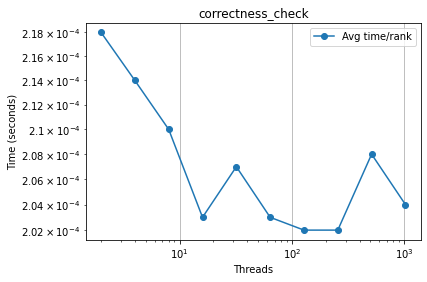

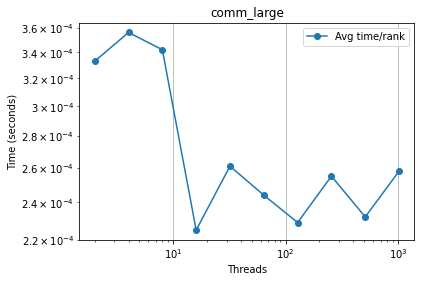

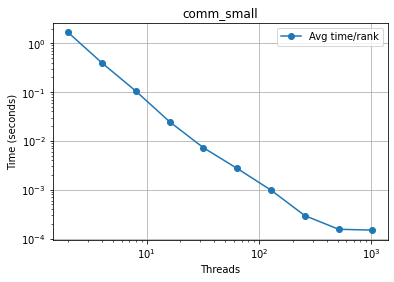

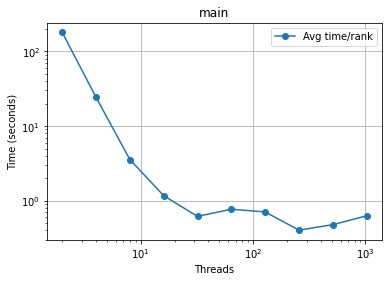

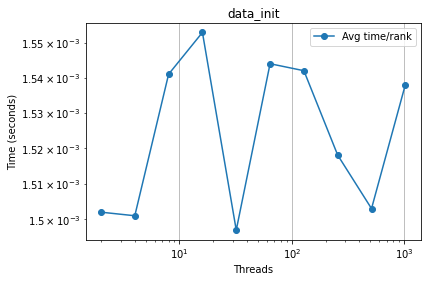

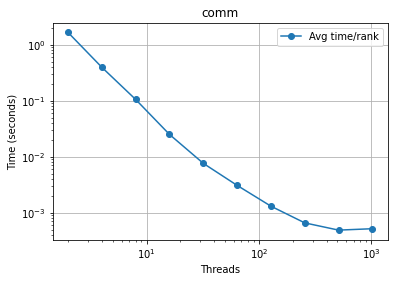

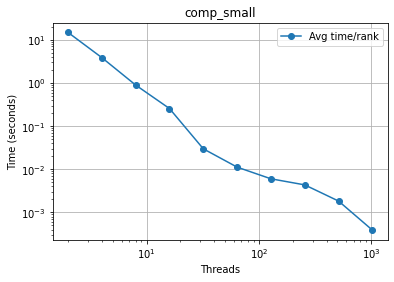

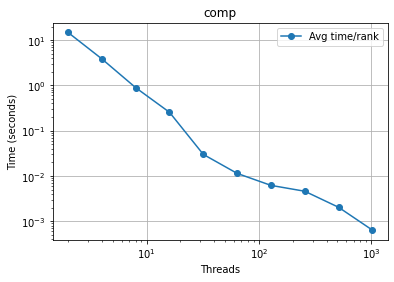

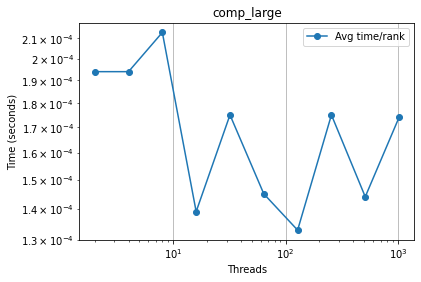

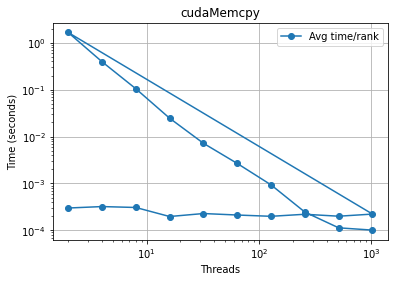

In [73]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name,65536],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

/tmp/job.9401951/ipykernel_67055/2639715118.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,262144],
/tmp/job.9401951/ipykernel_67055/2639715118.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,262144],
/tmp/job.9401951/ipykernel_67055/2639715118.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,262144],
/tmp/job.9401951/ipykernel_67055/2639715118.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,262144],
/tmp/job.9401951/ipykernel_67055/2639715118.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,262144],
/tmp/job.9401951/ipykernel_67055/2639715118.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,262144],
/tmp/job.9401951/ipykernel_67055/2639715118.py

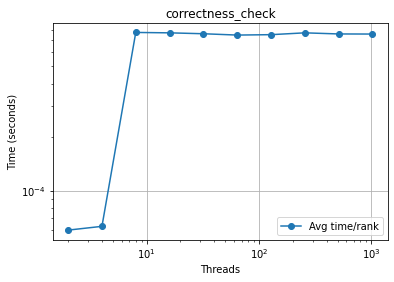

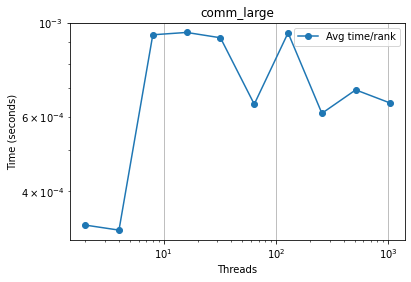

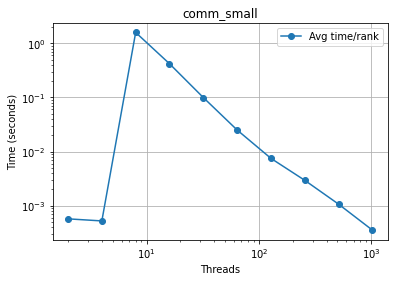

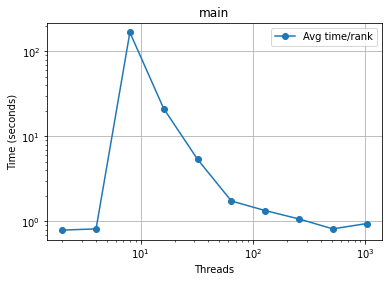

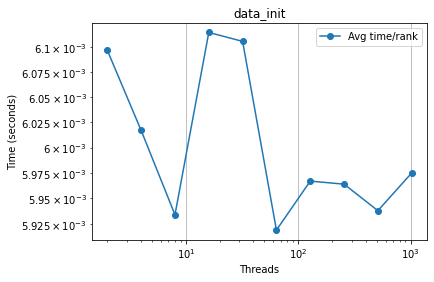

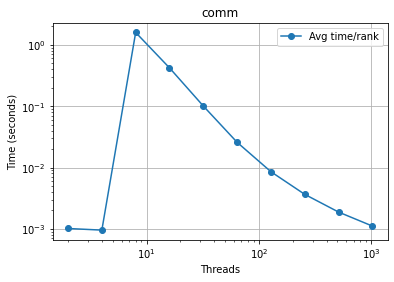

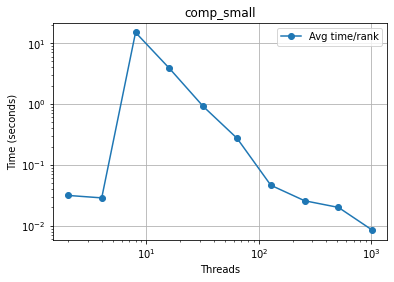

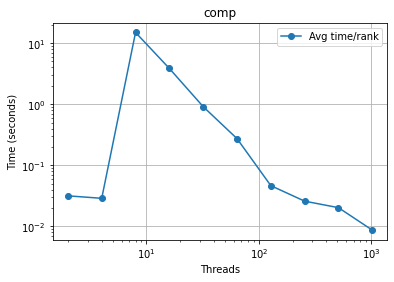

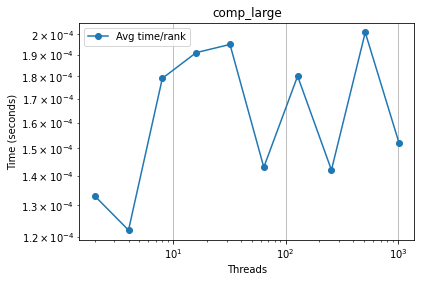

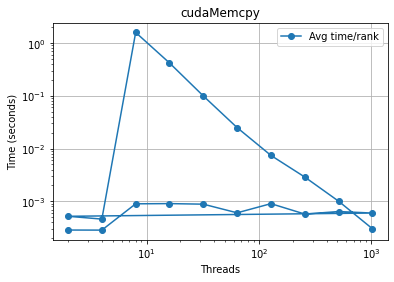

In [74]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name,262144],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

/tmp/job.9401951/ipykernel_67055/1239280731.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,1048576],
/tmp/job.9401951/ipykernel_67055/1239280731.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,1048576],
/tmp/job.9401951/ipykernel_67055/1239280731.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,1048576],
/tmp/job.9401951/ipykernel_67055/1239280731.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,1048576],
/tmp/job.9401951/ipykernel_67055/1239280731.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,1048576],
/tmp/job.9401951/ipykernel_67055/1239280731.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,1048576],
/tmp/job.9401951/ipykernel_67055/1239280

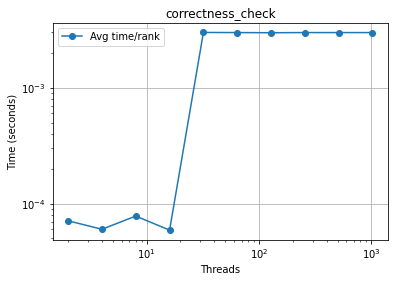

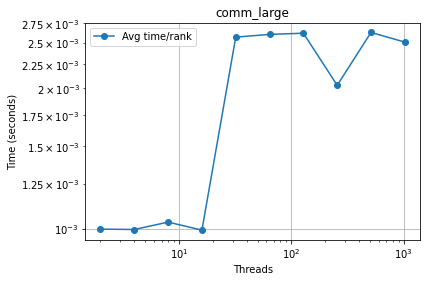

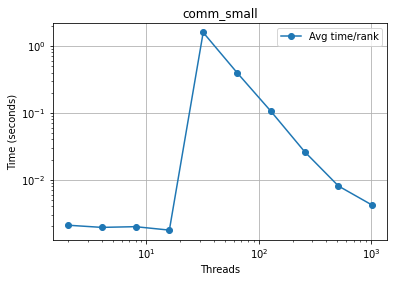

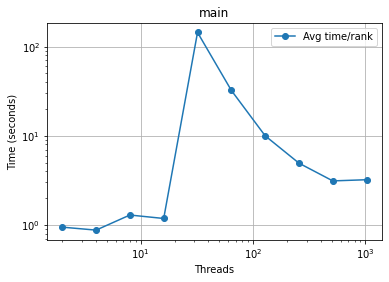

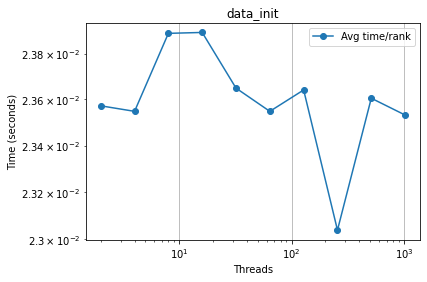

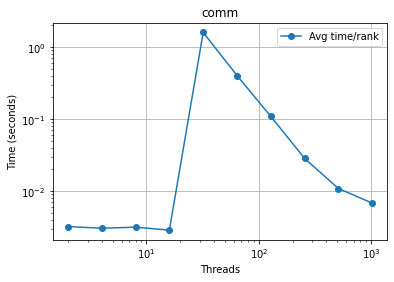

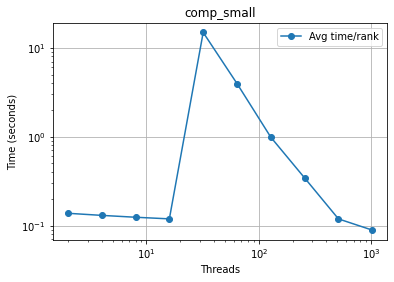

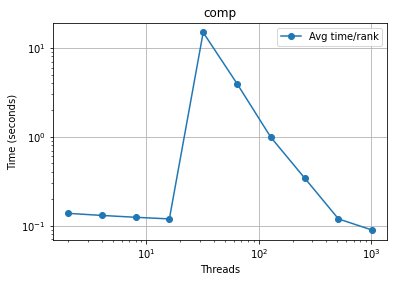

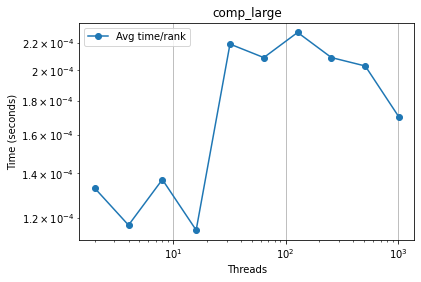

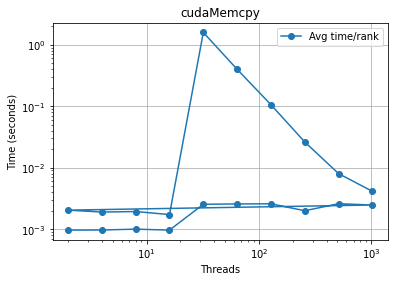

In [75]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name,1048576],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

/tmp/job.9401951/ipykernel_67055/225488793.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,4194304],
/tmp/job.9401951/ipykernel_67055/225488793.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,4194304],
/tmp/job.9401951/ipykernel_67055/225488793.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,4194304],
/tmp/job.9401951/ipykernel_67055/225488793.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,4194304],
/tmp/job.9401951/ipykernel_67055/225488793.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,4194304],
/tmp/job.9401951/ipykernel_67055/225488793.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,4194304],
/tmp/job.9401951/ipykernel_67055/225488793.py:

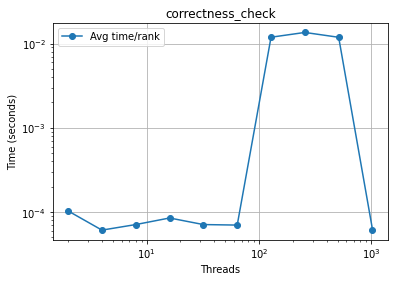

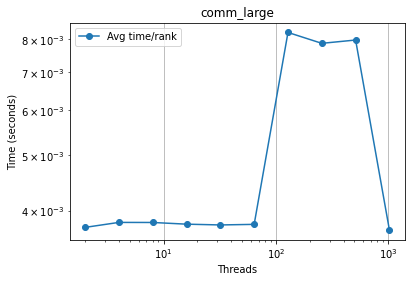

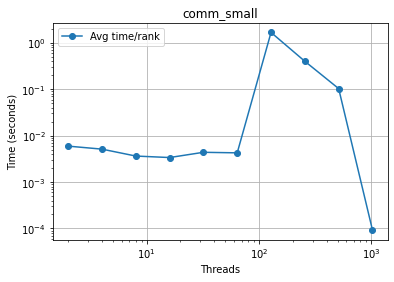

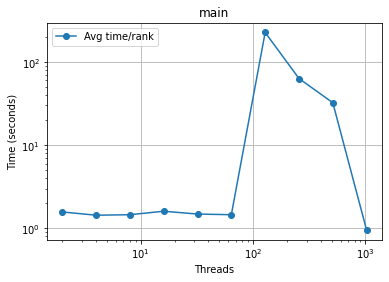

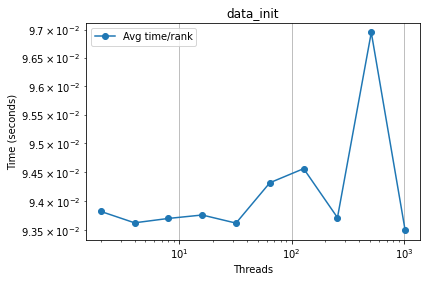

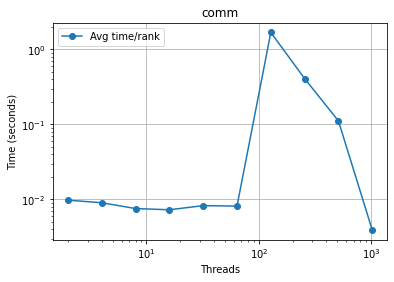

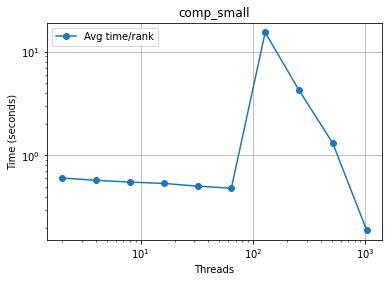

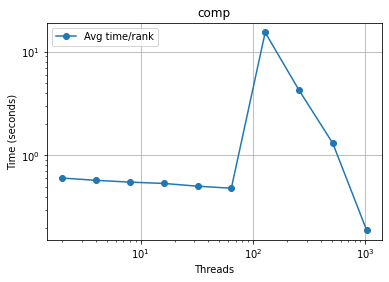

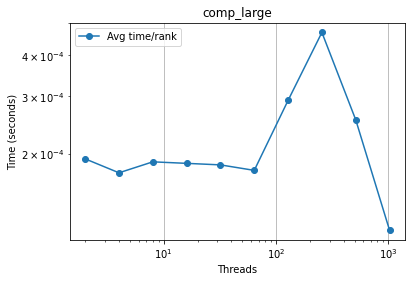

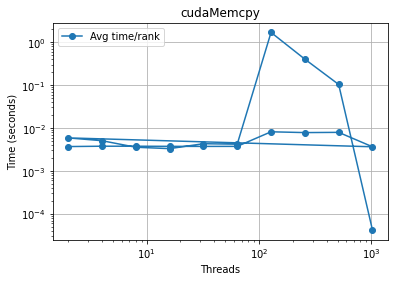

In [76]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name,4194304],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

/tmp/job.9401951/ipykernel_67055/2991264091.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,16777216],
/tmp/job.9401951/ipykernel_67055/2991264091.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,16777216],
/tmp/job.9401951/ipykernel_67055/2991264091.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,16777216],
/tmp/job.9401951/ipykernel_67055/2991264091.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,16777216],
/tmp/job.9401951/ipykernel_67055/2991264091.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,16777216],
/tmp/job.9401951/ipykernel_67055/2991264091.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,16777216],
/tmp/job.9401951/ipykernel_67055/2

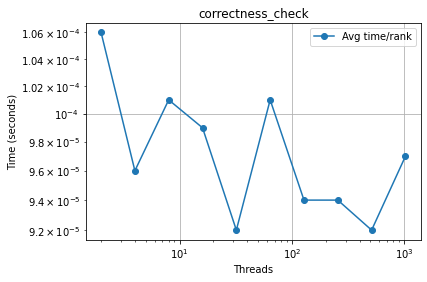

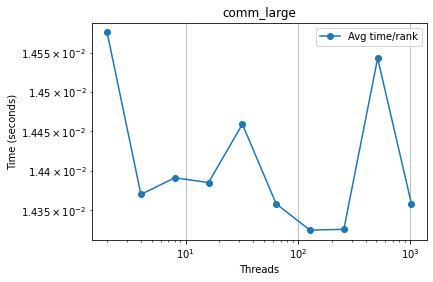

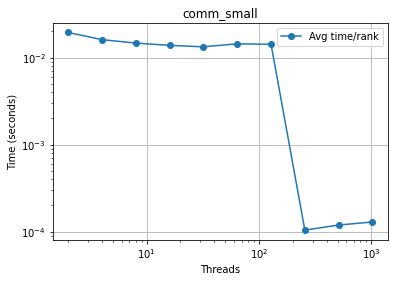

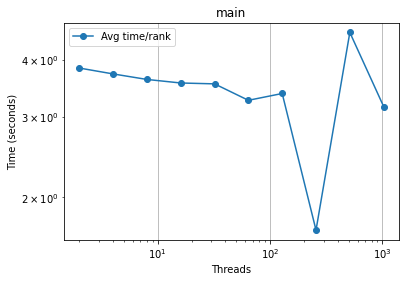

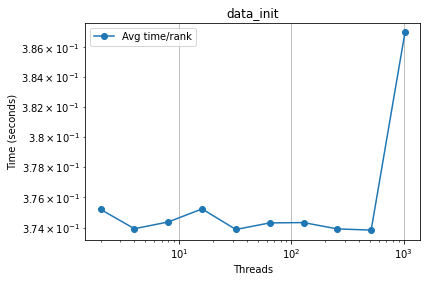

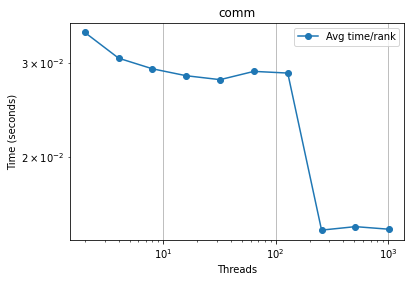

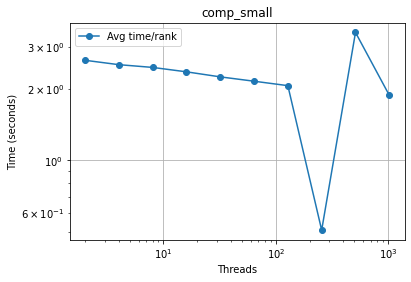

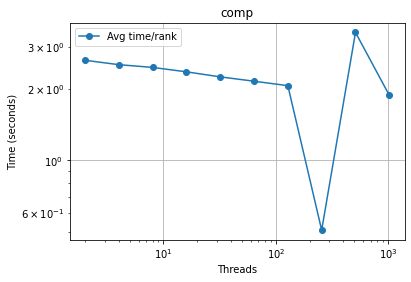

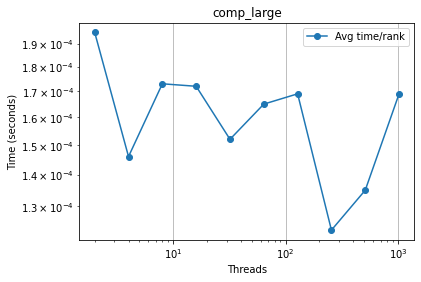

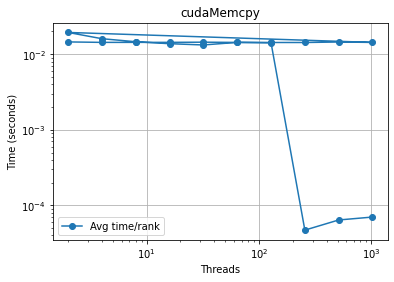

In [77]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name,16777216],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

/tmp/job.9401951/ipykernel_67055/3505502114.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,67108864],
/tmp/job.9401951/ipykernel_67055/3505502114.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,67108864],
/tmp/job.9401951/ipykernel_67055/3505502114.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,67108864],
/tmp/job.9401951/ipykernel_67055/3505502114.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,67108864],
/tmp/job.9401951/ipykernel_67055/3505502114.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,67108864],
/tmp/job.9401951/ipykernel_67055/3505502114.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc[name,67108864],
/tmp/job.9401951/ipykernel_67055/3

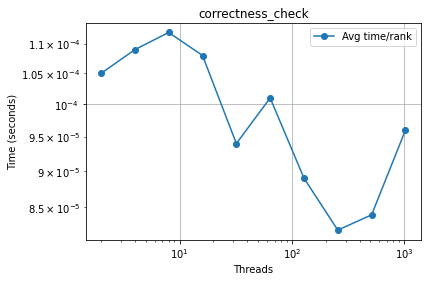

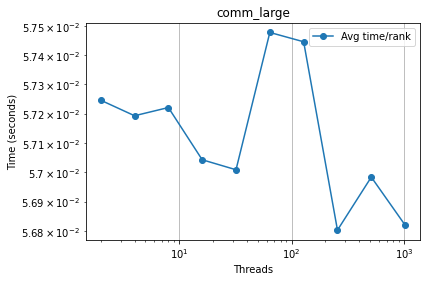

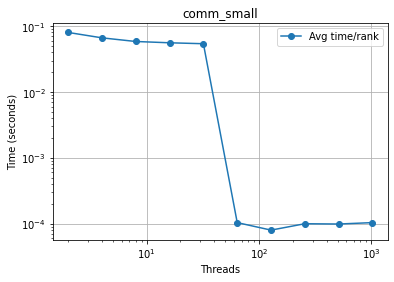

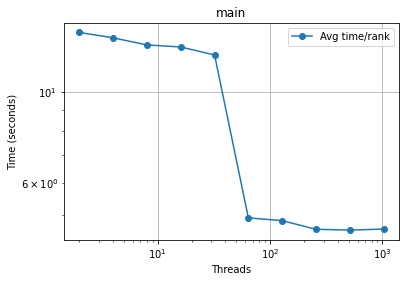

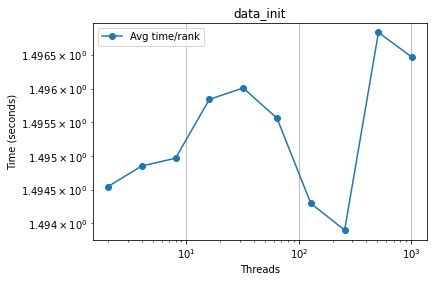

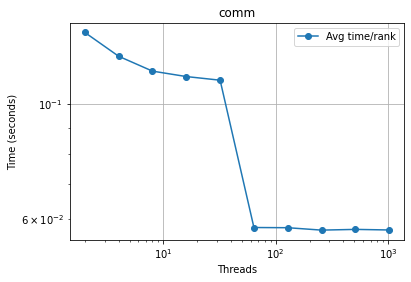

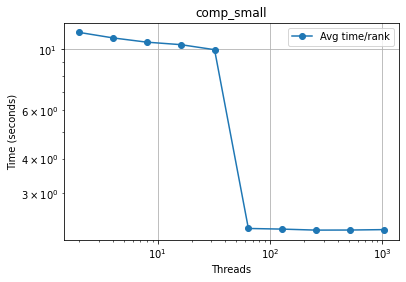

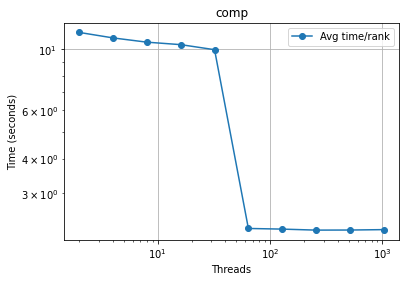

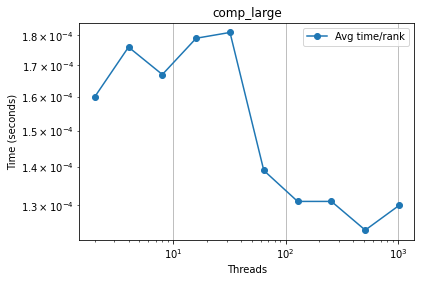

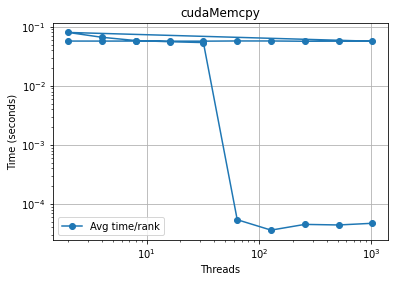

In [78]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name,67108864],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

/tmp/job.9401951/ipykernel_67055/3163118103.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["comp",sz],
/tmp/job.9401951/ipykernel_67055/3163118103.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["comp",sz],
/tmp/job.9401951/ipykernel_67055/3163118103.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["comp",sz],
/tmp/job.9401951/ipykernel_67055/3163118103.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["comp",sz],
/tmp/job.9401951/ipykernel_67055/3163118103.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["comp",sz],
/tmp/job.9401951/ipykernel_67055/3163118103.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["comp",sz],


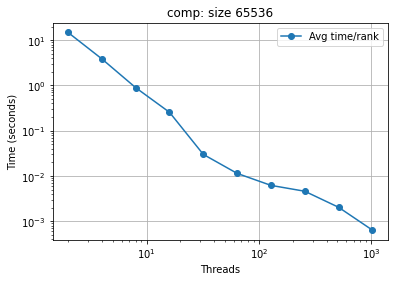

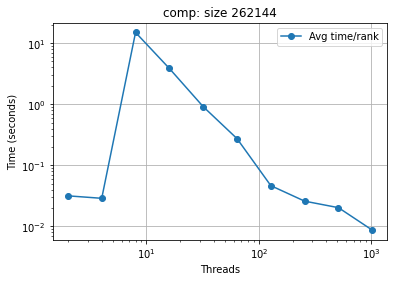

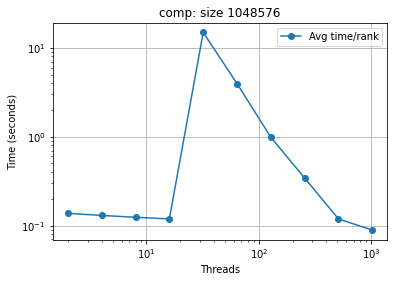

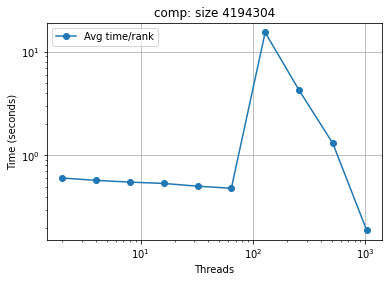

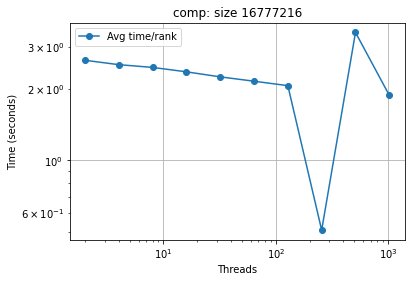

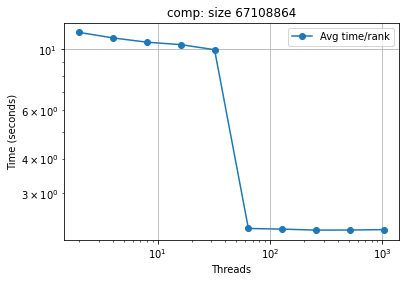

In [79]:
for sz in [65536, 262144,1048576,4194304,16777216,67108864]:
    plot_pandas(
        df=ctk.dataframe.loc["comp",sz],
        title="comp: size "+str(sz),
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

/tmp/job.9401951/ipykernel_67055/570107953.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["comm",sz],
/tmp/job.9401951/ipykernel_67055/570107953.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["comm",sz],
/tmp/job.9401951/ipykernel_67055/570107953.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["comm",sz],
/tmp/job.9401951/ipykernel_67055/570107953.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["comm",sz],
/tmp/job.9401951/ipykernel_67055/570107953.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["comm",sz],
/tmp/job.9401951/ipykernel_67055/570107953.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["comm",sz],


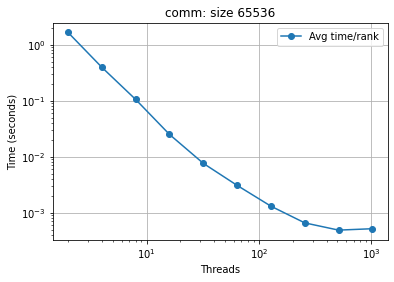

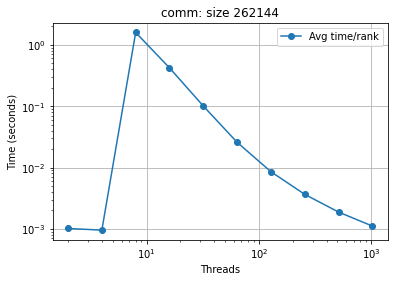

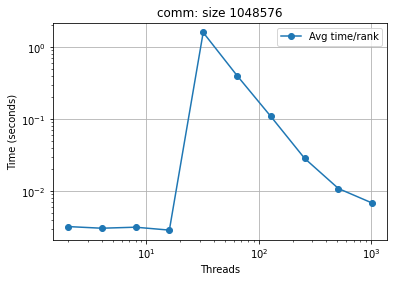

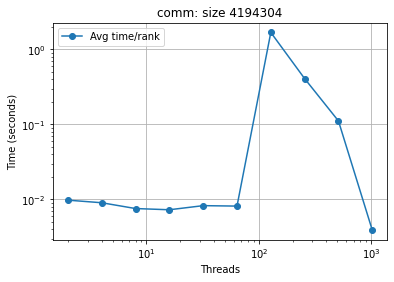

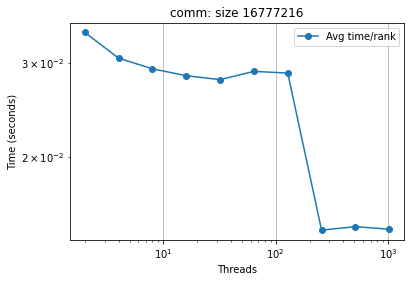

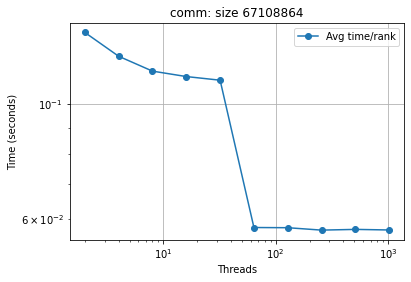

In [80]:
for sz in [65536, 262144,1048576,4194304,16777216,67108864]:
    plot_pandas(
        df=ctk.dataframe.loc["comm",sz],
        title="comm: size "+str(sz),
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

/tmp/job.9401951/ipykernel_67055/2704266182.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["main",sz],
/tmp/job.9401951/ipykernel_67055/2704266182.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["main",sz],
/tmp/job.9401951/ipykernel_67055/2704266182.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["main",sz],
/tmp/job.9401951/ipykernel_67055/2704266182.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["main",sz],
/tmp/job.9401951/ipykernel_67055/2704266182.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["main",sz],
/tmp/job.9401951/ipykernel_67055/2704266182.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["main",sz],


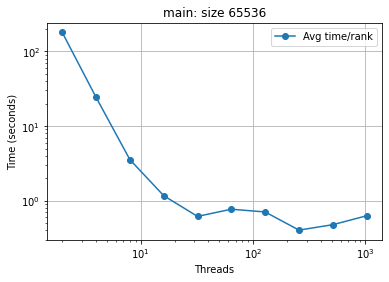

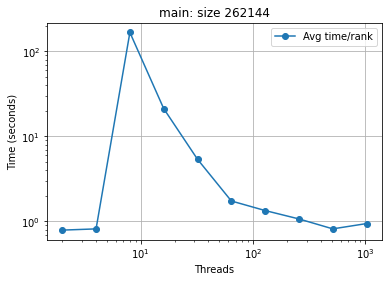

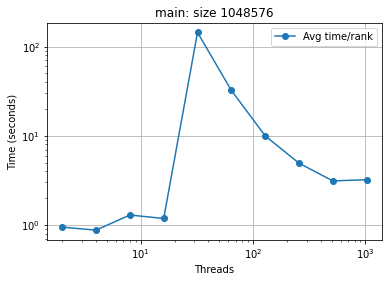

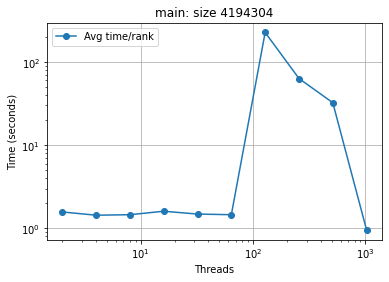

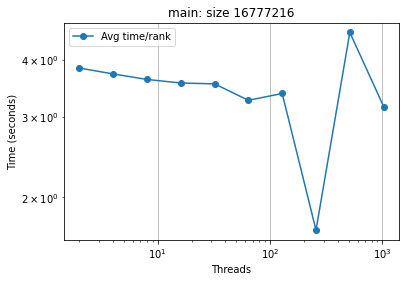

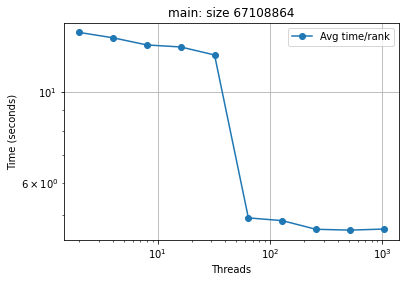

In [81]:
for sz in [65536, 262144,1048576,4194304,16777216,67108864]:
    plot_pandas(
        df=ctk.dataframe.loc["main",sz],
        title="main: size "+str(sz),
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

/tmp/job.9401951/ipykernel_67055/3901181177.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["data_init",sz],
/tmp/job.9401951/ipykernel_67055/3901181177.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["data_init",sz],
/tmp/job.9401951/ipykernel_67055/3901181177.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["data_init",sz],
/tmp/job.9401951/ipykernel_67055/3901181177.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["data_init",sz],
/tmp/job.9401951/ipykernel_67055/3901181177.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["data_init",sz],
/tmp/job.9401951/ipykernel_67055/3901181177.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["data_init",sz],


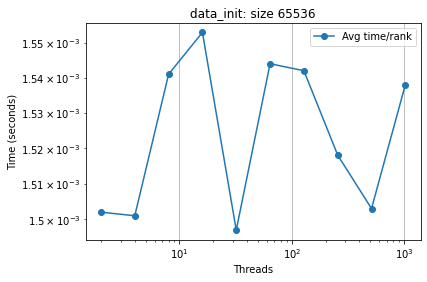

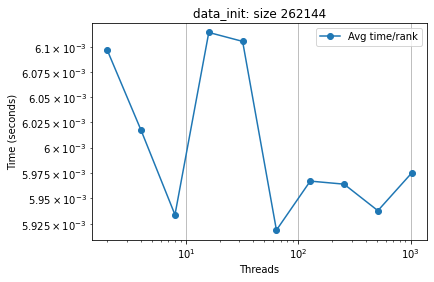

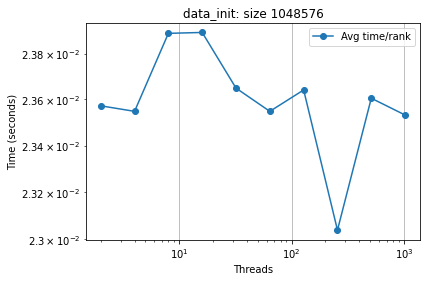

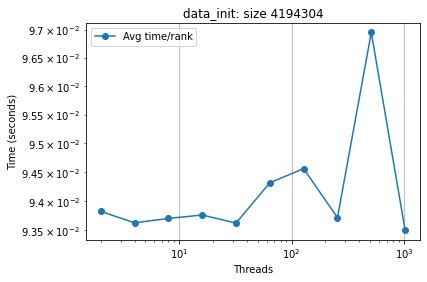

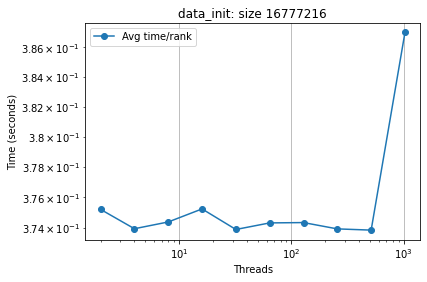

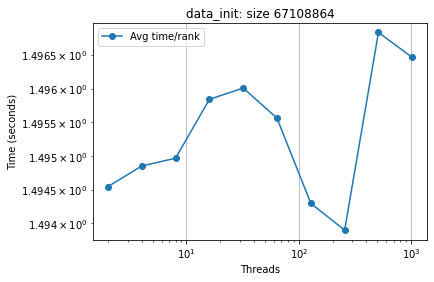

In [82]:
for sz in [65536, 262144,1048576,4194304,16777216,67108864]:
    plot_pandas(
        df=ctk.dataframe.loc["data_init",sz],
        title="data_init: size "+str(sz),
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

/tmp/job.9401951/ipykernel_67055/3032343902.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["correctness_check",sz],
/tmp/job.9401951/ipykernel_67055/3032343902.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["correctness_check",sz],
/tmp/job.9401951/ipykernel_67055/3032343902.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["correctness_check",sz],
/tmp/job.9401951/ipykernel_67055/3032343902.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["correctness_check",sz],
/tmp/job.9401951/ipykernel_67055/3032343902.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["correctness_check",sz],
/tmp/job.9401951/ipykernel_67055/3032343902.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=ctk.dataframe.loc["corr

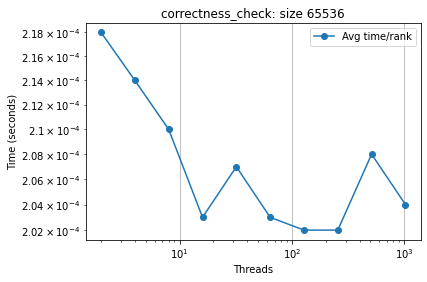

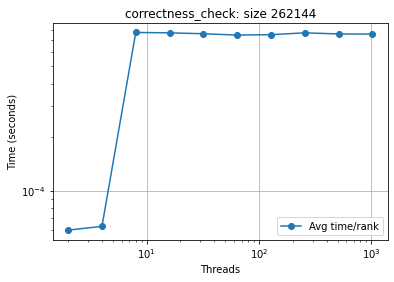

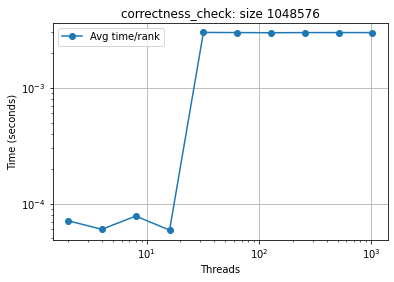

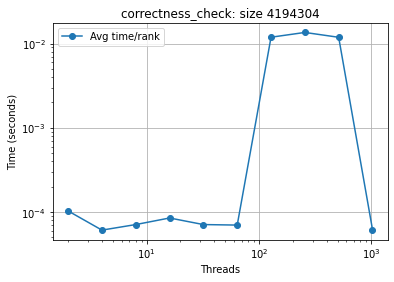

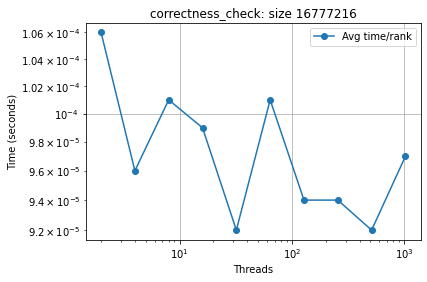

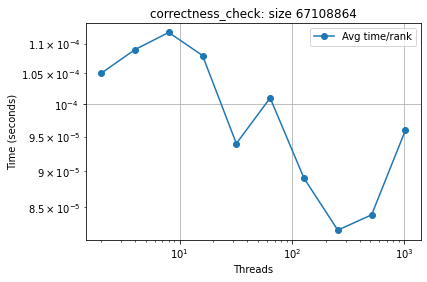

In [83]:
for sz in [65536, 262144,1048576,4194304,16777216,67108864]:
    plot_pandas(
        df=ctk.dataframe.loc["correctness_check",sz],
        title="correctness_check: size "+str(sz),
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

<AxesSubplot:title={'center':'Strong Scaling Main'}, xlabel='Threads', ylabel='Time (seconds)'>

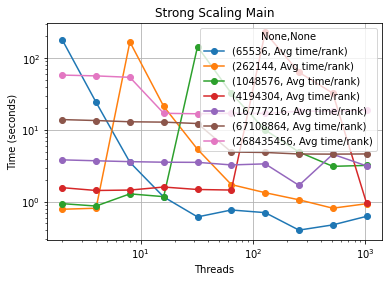

In [112]:
plot_pandas(
        df=ctk.dataframe.loc['main'],
        title='Strong Scaling Main',
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

<AxesSubplot:title={'center':'Strong Scaling Comp'}, xlabel='Threads', ylabel='Time (seconds)'>

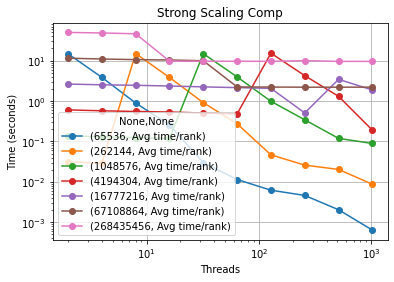

In [113]:
plot_pandas(
        df=ctk.dataframe.loc['comp'],
        title='Strong Scaling Comp',
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

<AxesSubplot:title={'center':'Strong Scaling Comm'}, xlabel='Threads', ylabel='Time (seconds)'>

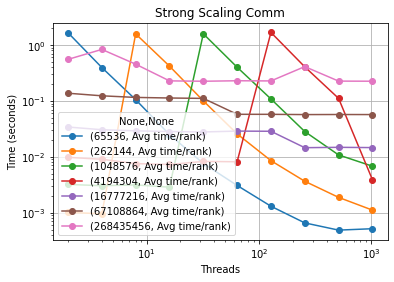

In [114]:
plot_pandas(
        df=ctk.dataframe.loc['comm'],
        title='Strong Scaling Comm',
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

<AxesSubplot:title={'center':'Data Init'}, xlabel='Threads', ylabel='Time (seconds)'>

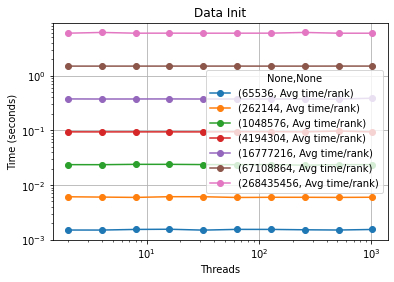

In [115]:
plot_pandas(
        df=ctk.dataframe.loc['data_init'],
        title='Data Init',
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

<AxesSubplot:title={'center':'Corectness Check'}, xlabel='Threads', ylabel='Time (seconds)'>

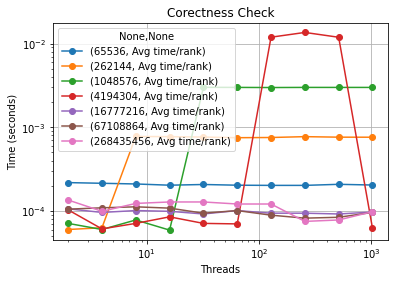

In [116]:
plot_pandas(
        df=ctk.dataframe.loc['correctness_check'],
        title='Corectness Check',
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

<AxesSubplot:title={'center':'Comp Large'}, xlabel='Threads', ylabel='Time (seconds)'>

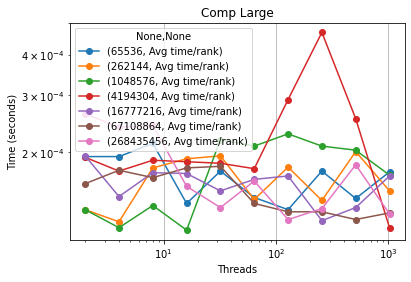

In [89]:
#MPI only
plot_pandas(
        df=ctk.dataframe.loc['comp_large'],
        title='Comp Large',
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

<AxesSubplot:title={'center':'Comm Large'}, xlabel='Threads', ylabel='Time (seconds)'>

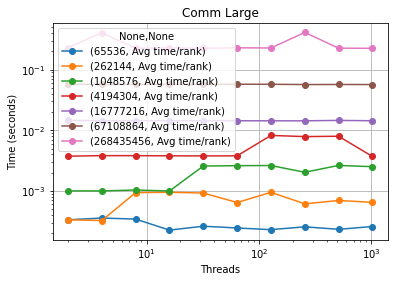

In [98]:
plot_pandas(
        df=ctk.dataframe.loc['comm_large'],
        title='Comm Large',
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

[[128, 512], [64, 256, 1024], [128, 512], [64, 256]]
[[1.0881402965420384, 0.9439216368793005], [0.023901169684401154, 0.012169428582643178, 0.2437866286133215], [0.5746845965514746, 0.24723785993856776], [0.5280501350739821, 0.45442529780098145]]


/tmp/job.9401951/ipykernel_67055/606637805.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  base=ctk.dataframe.loc['main',65536]['Avg time/rank'][64]
/tmp/job.9401951/ipykernel_67055/606637805.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  time.append(base/ctk.dataframe.loc['main',size]['Avg time/rank'][threads])


Text(0.5, 1.0, 'Weak Scaling Main')

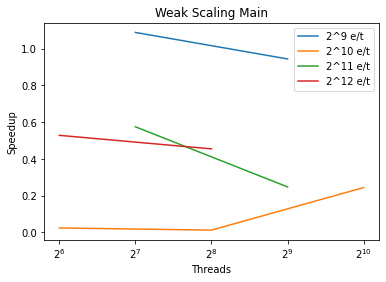

In [107]:
base=ctk.dataframe.loc['main',65536]['Avg time/rank'][64]
l=[]
thread_l=[]
times=[]
time=[]
for size in [65536,262144]:
    for init_t in [128,64]:
        thread_l=[]
        time=[]
        threads=init_t
        while threads<=1024 and size<=16777216:
            time.append(base/ctk.dataframe.loc['main',size]['Avg time/rank'][threads])
            thread_l.append(threads)
            threads*=4
            size*=4
        l.append(thread_l)
        times.append(time)

print(l)
print(times)
for i in range(len(times)):
    plt.plot(l[i],times[i])
plt.legend(["2^9 e/t", "2^10 e/t","2^11 e/t","2^12 e/t"])
plt.xscale("log", base=2)
plt.xlabel("Threads")
plt.ylabel("Speedup")
plt.title("Weak Scaling Main")
#plt.show()

[[128, 512], [64, 256, 1024], [128, 512], [64, 256]]
[[589.6937212863706, 409.43115364167994], [1.9172782585315822, 1.8867841323350714, 52.63395297977037], [90.14865972140935, 71.18402809871523], [94.33365997060265, 52.83254441929067]]


/tmp/job.9401951/ipykernel_67055/2771580664.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  base=ctk.dataframe.loc['main',65536]['Avg time/rank'][64]
/tmp/job.9401951/ipykernel_67055/2771580664.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  time.append(base/ctk.dataframe.loc['comm',size]['Avg time/rank'][threads])


Text(0.5, 1.0, 'Weak Scaling Comm')

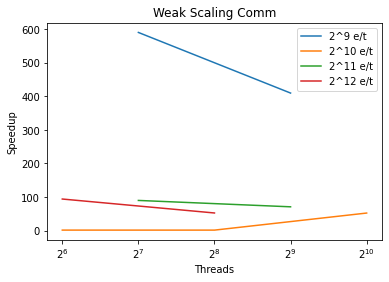

In [110]:
base=ctk.dataframe.loc['main',65536]['Avg time/rank'][64]
l=[]
thread_l=[]
times=[]
time=[]
for size in [65536,262144]:
    for init_t in [128,64]:
        thread_l=[]
        time=[]
        threads=init_t
        while threads<=1024 and size<=16777216:
            time.append(base/ctk.dataframe.loc['comm',size]['Avg time/rank'][threads])
            thread_l.append(threads)
            threads*=4
            size*=4
        l.append(thread_l)
        times.append(time)

print(l)
print(times)
for i in range(len(times)):
    plt.plot(l[i],times[i])
plt.legend(["2^9 e/t", "2^10 e/t","2^11 e/t","2^12 e/t"])
plt.xscale("log", base=2)
plt.xlabel("Threads")
plt.ylabel("Speedup")
plt.title("Weak Scaling Comm")
#plt.show()

[[128, 512], [64, 256, 1024], [128, 512], [64, 256]]
[[123.93627293208884, 37.934193675499955], [0.1945498555793071, 0.1808682729233521, 0.4105405516342141], [16.54933814681107, 6.465299406475878], [1.5976152148298124, 1.5161370338726126]]


/tmp/job.9401951/ipykernel_67055/2091066670.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  base=ctk.dataframe.loc['main',65536]['Avg time/rank'][64]
/tmp/job.9401951/ipykernel_67055/2091066670.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  time.append(base/ctk.dataframe.loc['comp',size]['Avg time/rank'][threads])


Text(0.5, 1.0, 'Weak Scaling Comp')

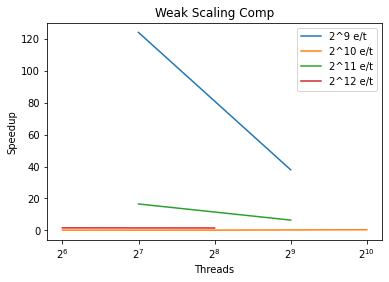

In [111]:
base=ctk.dataframe.loc['main',65536]['Avg time/rank'][64]
l=[]
thread_l=[]
times=[]
time=[]
for size in [65536,262144]:
    for init_t in [128,64]:
        thread_l=[]
        time=[]
        threads=init_t
        while threads<=1024 and size<=16777216:
            time.append(base/ctk.dataframe.loc['comp',size]['Avg time/rank'][threads])
            thread_l.append(threads)
            threads*=4
            size*=4
        l.append(thread_l)
        times.append(time)

print(l)
print(times)
for i in range(len(times)):
    plt.plot(l[i],times[i])
plt.legend(["2^9 e/t", "2^10 e/t","2^11 e/t","2^12 e/t"])
plt.xscale("log", base=2)
plt.xlabel("Threads")
plt.ylabel("Speedup")
plt.title("Weak Scaling Comp")
#plt.show()